In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re

# sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

# keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

In [3]:
a = pd.read_csv('./Data/u001_w001/u001_w001_accelerometer.log', delimiter='\t')

In [4]:
a_mag = np.zeros(a.shape[0])
for i in range(1, 4):
    a_mag += a.ix[:,i].values ** 2
a_mag = a_mag ** .5

In [5]:
sample = a_mag[1000:5000]

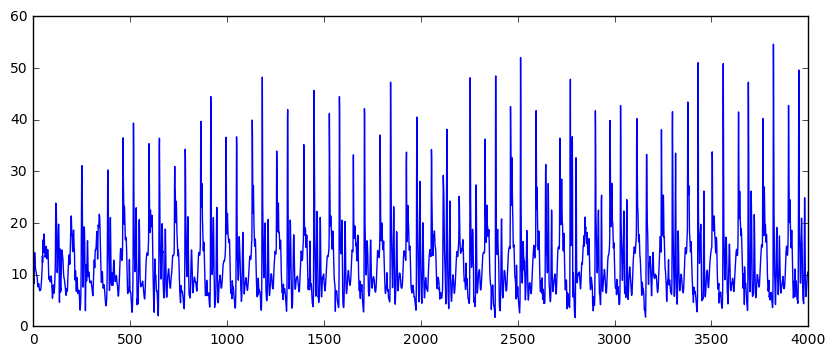

In [6]:
plt.figure(figsize=(10,4))
plt.plot(sample)

In [7]:
ft = np.fft.fft(sample)

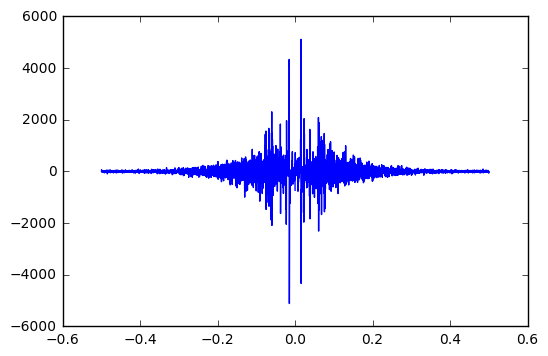

In [8]:
freq = np.fft.fftfreq(sample.shape[-1])
plt.plot(freq, ft.imag)

In [9]:
def delete_relevant(folder):
    if folder[-1] != '/':
        folder += '/'
    files = os.listdir(folder)
    for f in files:
        if re.match(r'u[0-9]+_w[0-9]+_accelerometer\.log', f) == None:
            print('deleting %s' % f)
            os.remove(folder + f)

In [10]:
base = './Data/'
for d in os.listdir(base):
    if os.path.isdir(base + d):
        delete_relevant(base + d)

In [11]:
u_dict = {}
files = [x for x in os.listdir(base) if os.path.isdir(base+x)]
for f in files:
    uid, trial = re.findall(r'u([0-9]+)_w([0-9]+)', f)[0]
    uid, trial = int(uid), int(trial)
    if uid not in u_dict:
        u_dict[uid] = [trial]
    else:
        u_dict[uid].append(trial)

In [12]:
u_dict

{1: [1, 2, 3],
 2: [1, 2, 3, 4],
 3: [1, 2],
 4: [1, 2],
 5: [1],
 6: [1],
 7: [1, 2],
 8: [1],
 9: [1],
 10: [1, 2, 3, 4],
 11: [1],
 12: [1, 2],
 13: [1],
 14: [1, 2],
 15: [1],
 16: [1, 2],
 17: [1],
 18: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 19: [1, 2],
 20: [1, 2],
 21: [1, 2, 3],
 22: [1],
 23: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 24: [1, 2, 3, 4, 5, 6, 7, 8],
 25: [1, 2, 3],
 26: [1, 2],
 27: [1, 2],
 28: [1, 2, 3, 4, 5, 6, 7],
 29: [1, 2],
 30: [1, 2],
 31: [1, 2],
 32: [1],
 33: [1, 2, 3, 4, 5, 6, 7],
 34: [1, 2],
 35: [1, 2],
 36: [1, 2, 3, 4, 5],
 37: [1, 2],
 38: [1, 2],
 39: [1],
 40: [1, 2, 3, 4],
 41: [1],
 42: [1],
 43: [1, 2, 3, 4, 5],
 44: [1],
 45: [1],
 46: [1, 2, 3],
 47: [1],
 48: [1],
 49: [1],
 50: [1]}

In [13]:
def gen_fname(uid, trial):
    f = lambda x: ('%3d' % x).replace(' ', '0')
    return 'u%s_w%s' % (f(uid), f(trial))

In [14]:
def get_data(uid, trial):
    fname = gen_fname(uid, trial)
    return pd.read_csv('./Data/%s/%s_accelerometer.log' % (fname, fname), delimiter='\t')

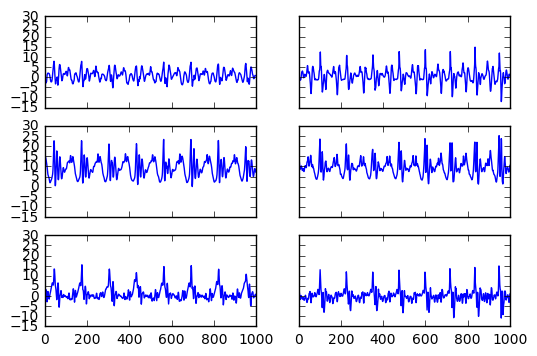

In [15]:
a = get_data(18,1)
b = get_data(18,9)
data1 = a.ix[1000:2000,1:].values
data2 = b.ix[1000:2000,1:].values

f, axarr = plt.subplots(3, 2, sharex=True, sharey=True)


for i in range(3):
    axarr[i, 0].plot(data1[:,i])
    axarr[i, 1].plot(data2[:,i])

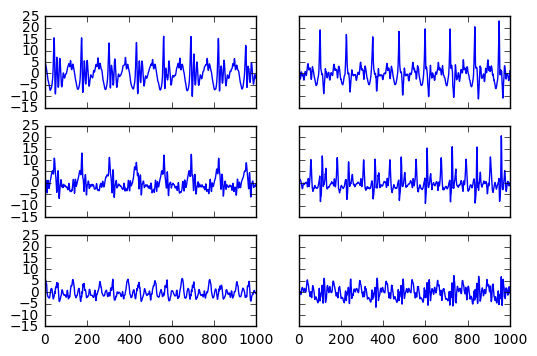

In [16]:
pca = PCA(n_components=3)
data3 = pca.fit_transform(data1)
data4 = pca.fit_transform(data2)

f, axarr = plt.subplots(3, 2, sharex=True, sharey=True)
for i in range(3):
    axarr[i, 0].plot(data3[:,i])
    axarr[i, 1].plot(data4[:,i])

In [ ]:
model = Sequential([
        
    ])